# Linear Regression Part 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2018-01-01'
end = '2022-07-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.42,11.02,10.34,10.98,10.98,44146300
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000


In [3]:
dataset['Open_Close'] = (dataset['Open'] - dataset['Adj Close'])/dataset['Open']
dataset['High_Low'] = (dataset['High'] - dataset['Low'])/dataset['Low']
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,,,
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700,0.005168,0.068662,0,1,1,0.051913
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000,-0.001653,0.038429,0,1,0,0.049351
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900,0.025431,0.048027,0,0,1,-0.019802
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000,-0.022481,0.037975,0,0,0,0.033670
2018-01-09,12.00,12.02,11.71,11.82,11.82,62560900,0.015000,0.026473,0,0,1,-0.037459


In [4]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,,,
2022-06-24,83.559998,87.529999,83.080002,87.080002,87.080002,88553900,-0.042125,0.053563,0,1,0,0.056412
2022-06-27,87.360001,88.220001,85.250000,86.160004,86.160004,74663500,0.013736,0.034839,1,0,0,-0.010565
2022-06-28,85.709999,86.730003,80.430000,80.779999,80.779999,95618600,0.057520,0.078329,1,0,0,-0.062442
2022-06-29,79.550003,79.750000,76.510002,77.989998,77.989998,104140900,0.019610,0.042347,1,0,0,-0.034538
2022-06-30,77.730003,78.910004,75.480003,76.470001,76.470001,105368600,0.016210,0.045443,0,0,0,-0.019490


In [5]:
dataset.shape

(1131, 12)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1131 entries, 2018-01-03 to 2022-06-30
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               1131 non-null   float64
 1   High               1131 non-null   float64
 2   Low                1131 non-null   float64
 3   Close              1131 non-null   float64
 4   Adj Close          1131 non-null   float64
 5   Volume             1131 non-null   int64  
 6   Open_Close         1131 non-null   float64
 7   High_Low           1131 non-null   float64
 8   Increase_Decrease  1131 non-null   int32  
 9   Buy_Sell_on_Open   1131 non-null   int32  
 10  Buy_Sell           1131 non-null   int32  
 11  Returns            1131 non-null   float64
dtypes: float64(8), int32(3), int64(1)
memory usage: 101.6 KB


In [7]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
count,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1.131000e+03,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000
mean,59.415703,60.633121,58.098355,59.372785,59.372785,7.023436e+07,-0.000252,0.044467,0.468612,0.523431,0.511052,0.002356
std,38.269743,39.053046,37.360840,38.194456,38.194456,3.667395e+07,0.029720,0.023066,0.499235,0.499672,0.500099,0.035892
min,9.080000,9.770000,9.040000,9.530000,9.530000,1.670590e+07,-0.115245,0.012392,0.000000,0.000000,0.000000,-0.154454
25%,26.570001,27.235000,25.895000,26.365001,26.365001,4.385690e+07,-0.016676,0.027543,0.000000,0.000000,0.000000,-0.016983
50%,51.340000,52.299999,49.900002,51.709999,51.709999,5.858360e+07,0.001012,0.038686,0.000000,1.000000,1.000000,0.000744
75%,88.305000,90.355000,86.584999,88.424999,88.424999,8.713595e+07,0.016407,0.054838,1.000000,1.000000,1.000000,0.021183
max,163.279999,164.460007,156.100006,161.910004,161.910004,3.250584e+08,0.124676,0.148305,1.000000,1.000000,1.000000,0.199481


In [8]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
X = dataset[['High', 'Low', 'Open', 'Volume', 'High_Low', 'Open_Close', 'Returns']].values
y = dataset['Adj Close'].values
print(X)

[[ 1.21400003e+01  1.13599997e+01  1.16099997e+01 ...  6.86620344e-02
   5.16791281e-03  5.19126295e-02]
 [ 1.24300003e+01  1.19700003e+01  1.21000004e+01 ...  3.84294092e-02
  -1.65285153e-03  4.93506221e-02]
 [ 1.22200003e+01  1.16599998e+01  1.21899996e+01 ...  4.80274809e-02
   2.54306380e-02 -1.98019615e-02]
 ...
 [ 8.67300034e+01  8.04300003e+01  8.57099991e+01 ...  7.83290194e-02
   5.75195468e-02 -6.24420224e-02]
 [ 7.97500000e+01  7.65100021e+01  7.95500031e+01 ...  4.23473765e-02
   1.96103724e-02 -3.45382639e-02]
 [ 7.89100037e+01  7.54800034e+01  7.77300034e+01 ...  4.54425033e-02
   1.62099843e-02 -1.94896357e-02]]


In [10]:
print(X.dtype.names)

None


In [11]:
X

array([[ 1.21400003e+01,  1.13599997e+01,  1.16099997e+01, ...,
         6.86620344e-02,  5.16791281e-03,  5.19126295e-02],
       [ 1.24300003e+01,  1.19700003e+01,  1.21000004e+01, ...,
         3.84294092e-02, -1.65285153e-03,  4.93506221e-02],
       [ 1.22200003e+01,  1.16599998e+01,  1.21899996e+01, ...,
         4.80274809e-02,  2.54306380e-02, -1.98019615e-02],
       ...,
       [ 8.67300034e+01,  8.04300003e+01,  8.57099991e+01, ...,
         7.83290194e-02,  5.75195468e-02, -6.24420224e-02],
       [ 7.97500000e+01,  7.65100021e+01,  7.95500031e+01, ...,
         4.23473765e-02,  1.96103724e-02, -3.45382639e-02],
       [ 7.89100037e+01,  7.54800034e+01,  7.77300034e+01, ...,
         4.54425033e-02,  1.62099843e-02, -1.94896357e-02]])

In [12]:
print(y)

[11.55000019 12.11999989 11.88000011 ... 80.77999878 77.98999786
 76.47000122]


In [13]:

# Split data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [14]:
# Create Regression Model 
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

#Printing Coefficient
print(model.coef_)

[ 5.84601906e-01  6.39590277e-01 -2.23415020e-01 -2.63620981e-09
  2.84446069e+00 -1.58266015e+01  7.02997795e+00]


In [15]:
coeff_df = pd.DataFrame(model.coef_,X.dtype.names,columns={'Coefficient'})
coeff_df

,Coefficient
0,5.846019e-01
1,6.395903e-01
2,-2.234150e-01
3,-2.636210e-09
4,2.844461e+00
5,-1.582660e+01
6,7.029978e+00


In [16]:
coeff_df = pd.DataFrame(model.coef_,['High', 'Low', 'Open', 'Volume', 'High_Low', 'Open_Close', 'Returns'],columns={'Coefficient'})
coeff_df

,Coefficient
High,5.846019e-01
Low,6.395903e-01
Open,-2.234150e-01
Volume,-2.636210e-09
High_Low,2.844461e+00
Open_Close,-1.582660e+01
Returns,7.029978e+00


In [17]:
# Use model to make predictions
predicted = model.predict(X_test) 
print(predicted)

[ 31.42105278  27.23090196 134.78984403  13.11574906  20.65405771
  44.26358767  47.47237552  90.59455346  94.99462391  19.75571156
  14.2136152  113.35255987  48.66319552  79.99592407  19.05501715
 107.8987487   54.13078413  56.17487692  11.6369291   84.40197077
  29.99936335  84.87449735  81.94094415  12.270629    19.07151905
  48.76646329  29.51864084  42.84064194  14.41629136  17.19040892
  16.67241618 105.25472876  33.19687491  91.08043651  25.82475013
  52.56865007 148.44496459  76.31907977  54.74599391 121.17217296
  78.62681065 106.05898113  25.12196183  57.08346591 107.23210252
  15.95670337  11.68010161  35.33829754  23.55834813  11.43952202
  74.60650295  44.33523442  39.49788808  52.95734184  83.23372208
  91.43367678  34.34762101  15.88694723  19.80925245  57.47260497
  16.89672363  23.98461345  53.65573184  31.05036593 104.38604163
  80.9785897   75.37049523  96.2147226   89.17926451   9.30590811
  95.44373476 137.73295576  77.17301171 105.50348692  93.8865632
  29.975939

In [18]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
data.head(20)

,Actual,Predicted
0,31.510000,31.421053
1,27.420000,27.230902
2,132.740005,134.789844
3,13.000000,13.115749
4,20.400000,20.654058
5,44.150002,44.263588
6,47.560001,47.472376
7,90.620003,90.594553
8,95.120003,94.994624
9,19.430000,19.755712


In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 0.5090041265549652
Mean Squared Error: 0.5595658563710334
Root Mean Squared Error: 0.7480413466988529


<AxesSubplot:>

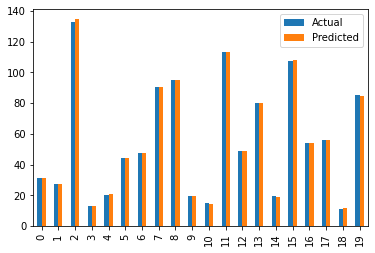

In [20]:
bar_chart = data.head(20)
bar_chart.plot(kind='bar')